<a href="https://colab.research.google.com/github/RayGone/SentimentAnalysis/blob/phase2/Experiments/IMDB_Classification_Using_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers tokenizers datasets -q
!pip install -q --upgrade accelerate einops xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed

rand_seed = 942

def seed_everything(seed=0):
    random.seed(seed) # random
    os.environ['PYTHONHASHSEED'] = str(seed) # python enviroment
    np.random.seed(seed) # numpy
    tf.keras.utils.set_random_seed(seed) # tensorflow
    tf.random.set_seed(seed) # tensorflow
    set_seed(seed) # hugging_face transformer

seed_everything(rand_seed)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [8]:
# !wget https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1
# !unzip archive.zip

# data = pd.read_csv('/content/IMDB Dataset.csv')
# data.head()

# pd.unique(data.sentiment)
# data.sentiment.value_counts()

# data.sentiment = data.apply(lambda x: 1 if x['sentiment']=='positive' else 0, axis =1)
# data.head()

# data = data.rename(columns = {'review':'text','sentiment':'label'})
# data

# data['text_len'] = data.apply(lambda x: len(x['text']), axis =1)
# data['text_len'].value_counts()

In [9]:
import datasets

data = datasets.load_dataset('imdb')
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [16]:
data = datasets.concatenate_datasets([data['train'],data['test']])
data = data.train_test_split(train_size=0.8)
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

# BERT Section

In [43]:
from transformers import TFBertForSequenceClassification, BertTokenizerFast

model_id = 'bert-base-uncased'

tokenizer = BertTokenizerFast.from_pretrained(model_id)

id2label = {1:"POSITIVE",0:"NEGATIVE"}
label2id={"POSITIVE":1,"NEGATIVE":0}

model = TFBertForSequenceClassification.from_pretrained(model_id,
          id2label=id2label,
          label2id=label2id,ignore_mismatched_sizes=True)

model.summary()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_74 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True,max_length=128)

num_proc = os.cpu_count()

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=num_proc,
    #remove_columns=data["train"].column_names,
)

# tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])
# tokenized_inputs = tokenized_inputs.remove_columns(['text'])
# tokenized_inputs = tokenized_inputs.remove_columns(['text_len'])

# tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
#     name="label",column=data['train']['label']
# )
# tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
#     name="label",column=data['test']['label']
# )

tokenized_inputs

CPU times: user 55 µs, sys: 4 µs, total: 59 µs
Wall time: 65.3 µs


DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10000
    })
})

In [47]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.03)
model.compile(optimizer=optimizer)

In [48]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [49]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

tf_train_set, tf_test_set

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


(<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(16, 128), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(16, 128), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 128), dtype=tf.int64, name=None)}, TensorSpec(shape=(16,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [50]:
%%time
n_epoch = 1

print("Training the model")
history = model.fit(x=tf_train_set,
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
2500/2500 [==============================] - 626s 242ms/step - loss: 0.3091 - val_loss: 0.2703
{'loss': [0.30910801887512207], 'val_loss': [0.27031657099723816]}
CPU times: user 9min 13s, sys: 1min 41s, total: 10min 54s
Wall time: 10min 25s


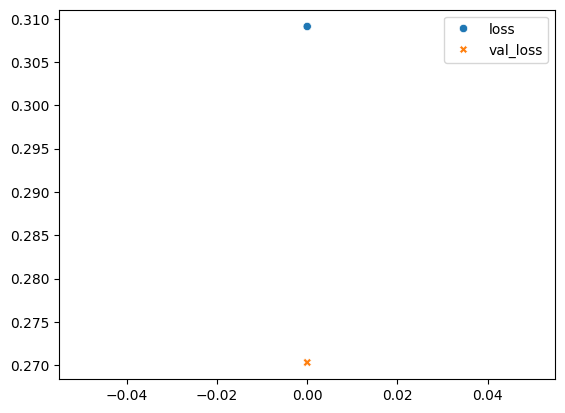

In [51]:
import seaborn

if n_epoch > 1:
  seaborn.lineplot(history.history)
else:
  seaborn.scatterplot(history.history)

In [52]:
%%time
from tqdm.auto import tqdm

print("Getting Test Prediction")
prediction = model.predict(tf_test_set)
prediction = [np.argmax(x) for x in prediction[0]]

actual_labels = data['test']['label']

Getting Test Prediction
  1/625 [..............................] - ETA: 34:15

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


625/625 [==============================] - 49s 73ms/step
CPU times: user 34.4 s, sys: 3.57 s, total: 38 s
Wall time: 49.3 s


F1-Score 0.8881871628439174
Precision-Score 0.8882938220952814
Recall-Score 0.8882
accuracy_Score 0.8882


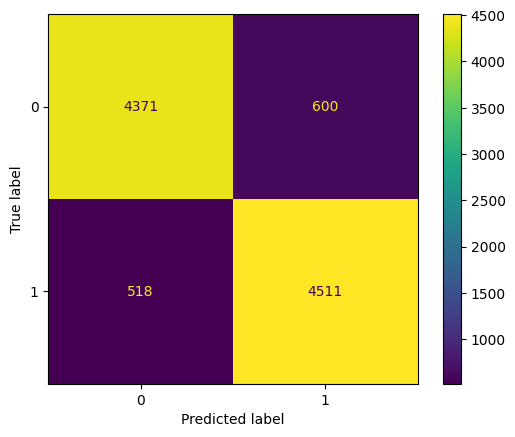

In [53]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,prediction,average='weighted'))
print("Precision-Score",precision_score(actual_labels,prediction,average='weighted'))
print("Recall-Score",recall_score(actual_labels,prediction,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,prediction))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,prediction,num_classes=2).numpy())
cmd.plot()

# GPT Section

In [18]:
from transformers import TFGPT2ForSequenceClassification, GPT2TokenizerFast

model_id = 'gpt2'

tokenizer = GPT2TokenizerFast.from_pretrained(model_id,padding_side='left',truncation_side='left')
tokenizer.add_special_tokens({'pad_token': tokenizer.unk_token})
print(tokenizer)

id2label = {1:"POSITIVE",0:"NEGATIVE"}
label2id={"POSITIVE":1,"NEGATIVE":0}

model = TFGPT2ForSequenceClassification.from_pretrained(model_id,
          id2label=id2label,
          label2id=label2id,
          ignore_mismatched_sizes=True,
          pad_token_id = tokenizer.pad_token_id)
model.summary()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='left', truncation_side='left', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2ForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFGPT2ForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tfgpt2_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 score (Dense)               multiple                  1536      
                                                                 
 transformer (TFGPT2MainLay  multiple                  124439808 
 er)                                                             
                                                                 
Total params: 124441344 (474.71 MB)
Trainable params: 124441344 (474.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from transformers import AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.03)
model.compile(optimizer=optimizer)

tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [20]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True,max_length=128,padding=True)

num_proc = os.cpu_count()

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=num_proc,
    remove_columns=data["train"].column_names,
)

# tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])
# tokenized_inputs = tokenized_inputs.remove_columns(['attention_mask'])
# tokenized_inputs = tokenized_inputs.remove_columns(['text'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['label']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['label']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/40000 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/10000 [00:00<?, ? examples/s]

CPU times: user 1.47 s, sys: 311 ms, total: 1.78 s
Wall time: 43.3 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 10000
    })
})

In [21]:
from transformers import DataCollatorWithPadding
print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        max_length=128,
                                        return_tensors="tf")
data_collator

Initializing Data Collator


DataCollatorWithPadding(tokenizer=GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='left', truncation_side='left', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=128, pad_to_multiple_of=None, return_tensors='tf')

In [22]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

tf_train_set, tf_test_set

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


(<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(16, 128), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 128), dtype=tf.int64, name=None)}, TensorSpec(shape=(16,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [23]:
%%time
n_epoch = 1

print("Training the model")
history = model.fit(x=tf_train_set,
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
2500/2500 [==============================] - 1251s 494ms/step - loss: 0.3242 - val_loss: 0.2242
{'loss': [0.32416293025016785], 'val_loss': [0.224195659160614]}
CPU times: user 17min 55s, sys: 2min 5s, total: 20min 1s
Wall time: 20min 51s


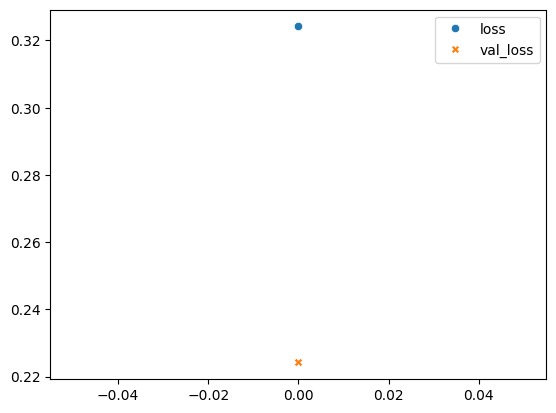

In [27]:
import seaborn

if n_epoch > 1:
  seaborn.lineplot(history.history)
else:
  seaborn.scatterplot(history.history)

In [28]:
%%time
!pip install tqdm
from tqdm.auto import tqdm

prediction = []
for x in tqdm(tf_test_set):
      prediction += list(np.argmax(model(x[0])[0],axis=1))

actual_labels = data['test']['label']

  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


CPU times: user 2min 11s, sys: 1.64 s, total: 2min 12s
Wall time: 2min 32s


F1-Score 0.9112554125620185
Precision-Score 0.9119194815696261
Recall-Score 0.9113
accuracy_Score 0.9113


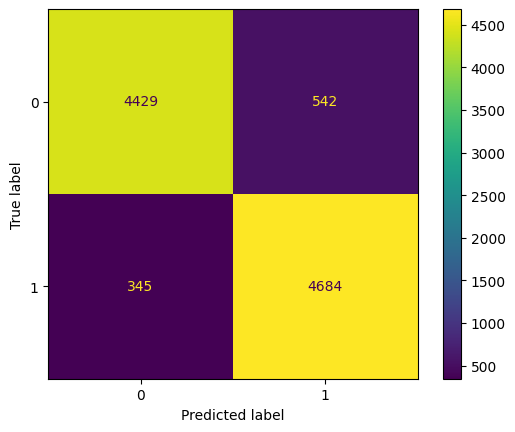

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,prediction,average='weighted'))
print("Precision-Score",precision_score(actual_labels,prediction,average='weighted'))
print("Recall-Score",recall_score(actual_labels,prediction,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,prediction))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,prediction,num_classes=2).numpy())
cmd.plot()

# GPT Embedding Layer

In [31]:
class GPTEmbedding(tf.keras.layers.Layer):
    def __init__(self, model,tokenizer, max_token_len=128,padding='max_length', trailing_context=4,truncation=True):
        super().__init__()
        self.embedding = model
        self.tokenizer = tokenizer
        self.tokenizer.padding_side = 'left'
        self.max_token = max_token_len
        self.padding = padding
        self.truncation = truncation
        self.trailing_context = trailing_context
        self.trainable=False

    def call(self, x):
        embeddings = self.embedding(
                      self.tokenizer(x,padding=self.padding,truncation=self.truncation,max_length=self.max_token,return_tensors='tf')
                    )[0][:,-self.trailing_context:,:]

        return tf.reduce_logsumexp(embeddings,axis=1)

gptEmbd = GPTEmbedding(model=model.transformer,tokenizer=tokenizer,trailing_context=1,max_token_len=128)

In [32]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data,model_dim, batch_size=32,shuffle=True):
        'Initialization'
        self.batch_size = batch_size
        self.data = data
        self.embeddings = np.empty((data.num_rows,model_dim))
        self.shuffle = shuffle
        # self.average = tf.keras.layers.Average()
        self.is_first_epoch = True
        self.on_epoch_end(is_first_epoch=self.is_first_epoch)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(self.data.num_rows / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        return self.__data_generation(indexes)

    def on_epoch_end(self,is_first_epoch=False):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.data.num_rows)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

        self.is_first_epoch = is_first_epoch


    def __data_generation(self, indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        chunk = self.data.select(indexes)

        if self.is_first_epoch:
            X = gptEmbd(chunk['text'])
            self.embeddings[indexes] = X
        else:
            X = self.embeddings[indexes]

        y = np.array(chunk['label'])
        return X,y



train_features = DataGenerator(data['train'],model_dim=768,batch_size=16)
test_features = DataGenerator(data['test'],model_dim=768,batch_size=16,shuffle=False)

In [33]:
sa_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(768)),
    tf.keras.layers.Dense(768,activation='relu',name='Pooler'),
    tf.keras.layers.Dropout(0.15,name='Dropout'),
    tf.keras.layers.Dense(3,activation='softmax',name='Activation')
])

In [34]:
sa_model.compile(
  optimizer=tf.keras.optimizers.Adam(
        learning_rate=5e-4,
        weight_decay=0.1
      ),
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

sa_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pooler (Dense)              (None, 768)               590592    
                                                                 
 Dropout (Dropout)           (None, 768)               0         
                                                                 
 Activation (Dense)          (None, 3)                 2307      
                                                                 
Total params: 592899 (2.26 MB)
Trainable params: 592899 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history = sa_model.fit(train_features,
        epochs=30,
        validation_data=test_features,
        callbacks=[tf.keras.callbacks.EarlyStopping(
                            monitor='val_acc', patience=3,
                            verbose=1, mode='auto',
                            restore_best_weights=True)
                        ])

Epoch 1/30
2500/2500 [==============================] - 726s 288ms/step - loss: 0.1968 - acc: 0.9288 - val_loss: 0.2191 - val_acc: 0.9151
Epoch 2/30
2500/2500 [==============================] - 22s 9ms/step - loss: 0.1755 - acc: 0.9334 - val_loss: 0.2172 - val_acc: 0.9162
Epoch 3/30
2500/2500 [==============================] - 20s 8ms/step - loss: 0.1740 - acc: 0.9338 - val_loss: 0.2260 - val_acc: 0.9120
Epoch 4/30
2500/2500 [==============================] - 20s 8ms/step - loss: 0.1730 - acc: 0.9347 - val_loss: 0.2307 - val_acc: 0.9086
Epoch 5/30
2500/2500 [==============================] - 24s 10ms/step - loss: 0.1723 - acc: 0.9351 - val_loss: 0.2299 - val_acc: 0.9149
Epoch 5: early stopping


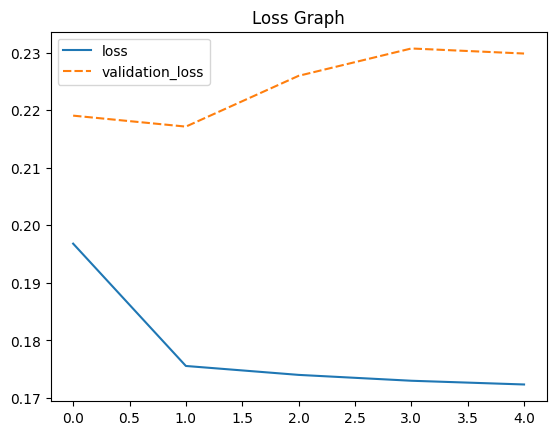

Text(0.5, 1.0, 'Accuracy Graph')

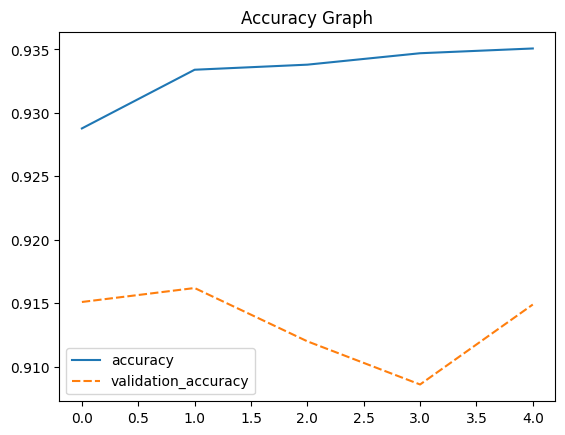

In [36]:
seaborn.lineplot({"loss":history.history['loss'],"validation_loss":history.history['val_loss']})
plt.title("Loss Graph")
plt.show()

seaborn.lineplot({"accuracy":history.history['acc'],"validation_accuracy":history.history['val_acc']})
plt.title("Accuracy Graph")

In [40]:
%%time

print("Getting Test Prediction")
pred_labels = [np.argmax(x) for x in sa_model.predict(test_features)]
actual_labels = data['test']['label']

Getting Test Prediction
625/625 [==============================] - 3s 4ms/step
CPU times: user 3.55 s, sys: 212 ms, total: 3.77 s
Wall time: 3.15 s


In [41]:
print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.9161962386646706
Precision-Score 0.916227959335812
Recall-Score 0.9162
accuracy_Score 0.9162


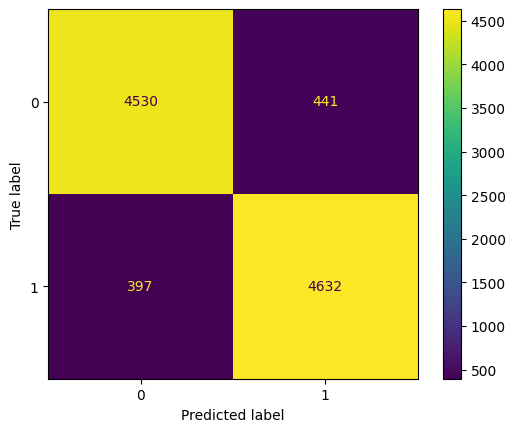

In [42]:
cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=2).numpy())
cmd.plot()